<a href="https://colab.research.google.com/github/Tulasipriya-yellanki/Machine-Learning---ML/blob/main/decision_tree_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision tree**
Decision tree is a non- parametric supervised learnig algorithm used for both classification and reression tasks. it is a hierarchical ,tree- like structure that consists of a root node,branches,internal nodes,and leaf node. The root node represens the entire dataset and the initial decision to be made.Internal nodes represents decision or tests on attributes,branches represents the outcome of these decisions, and leaf nodes represents the final outcome or predictions.

In [ ]:
# step 1: (importing the libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# cp- chest pain of patient
# trestbps- blood pressure in restin condiation
# chol - cholestrol level
#fbs- fasting blood sugar level
#restecg- electocardio graphy
#thalch- maximum heart rate acheived durin the test
#oldpeak-how much ecg changes
#slope- slope of ecg
#ca- the number of major blood vessels
#thal - a blood disorder that can damage the heart


In [ ]:
#step-2 Do EDA
df.shape

(303, 14)

In [ ]:
# checking how many people have heart problem or not
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#step-4 data cleaning
# check for null values
#check for duplicates
# outlier analysis


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

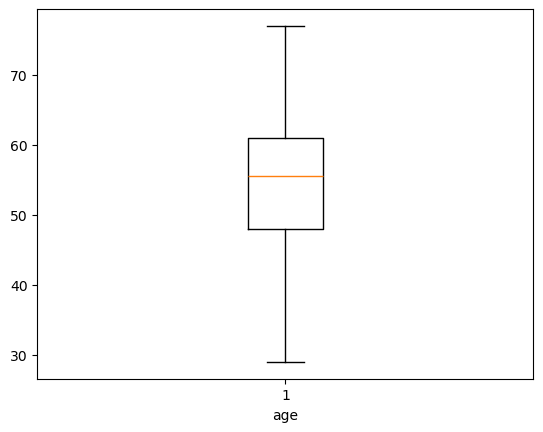

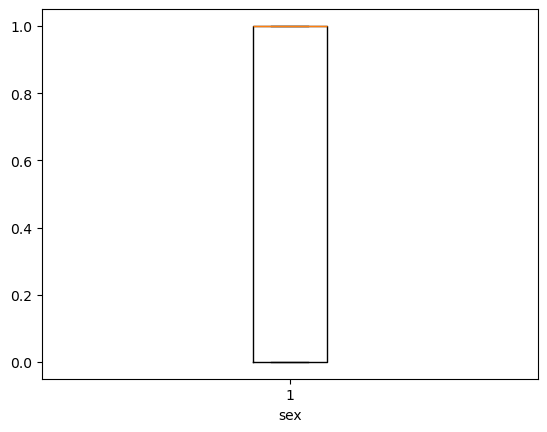

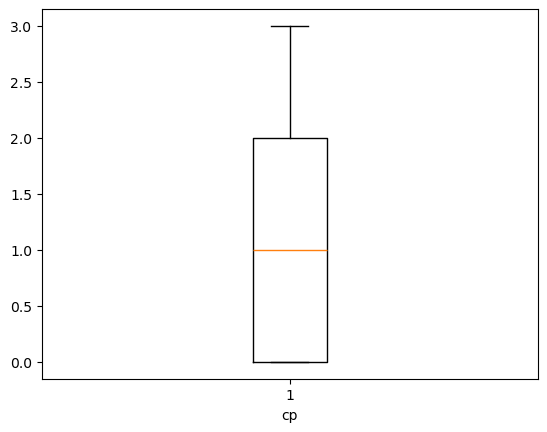

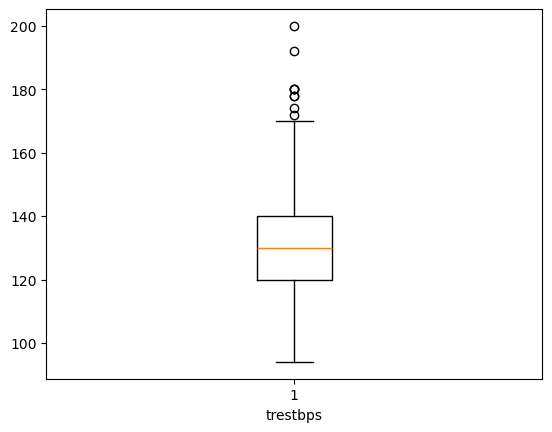

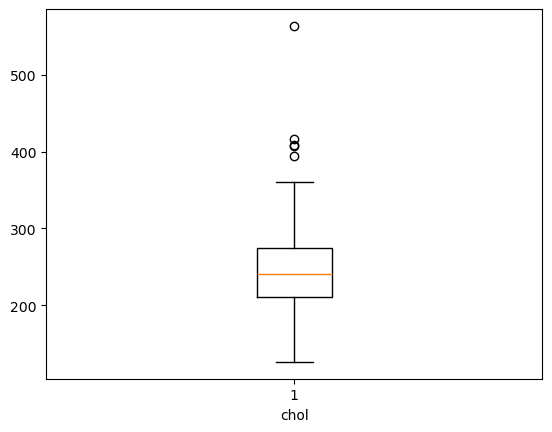

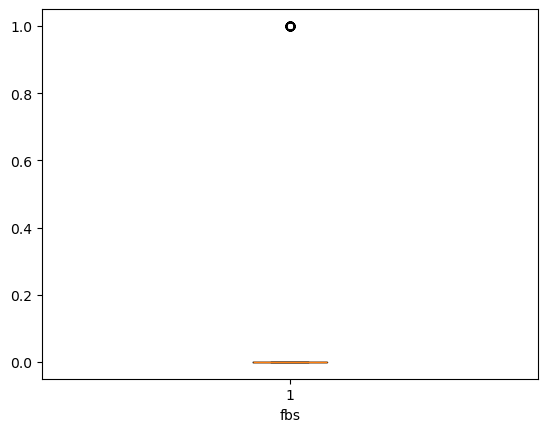

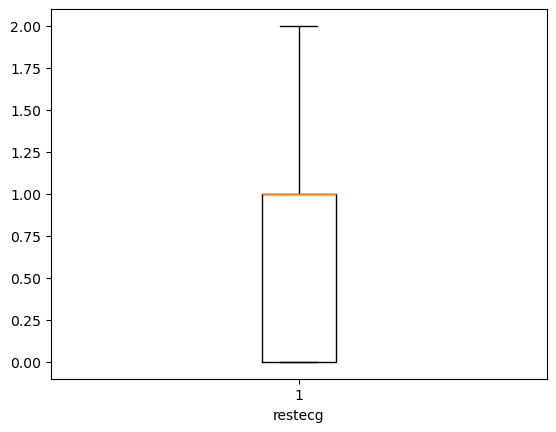

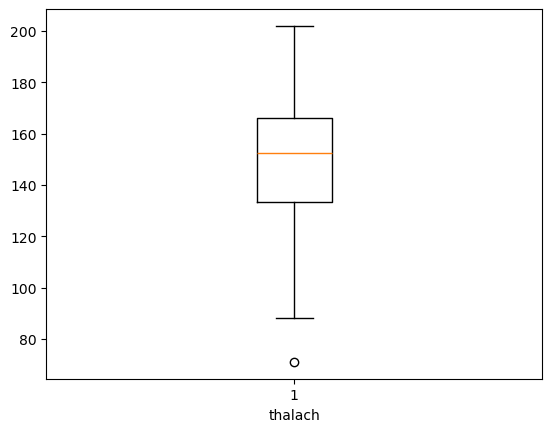

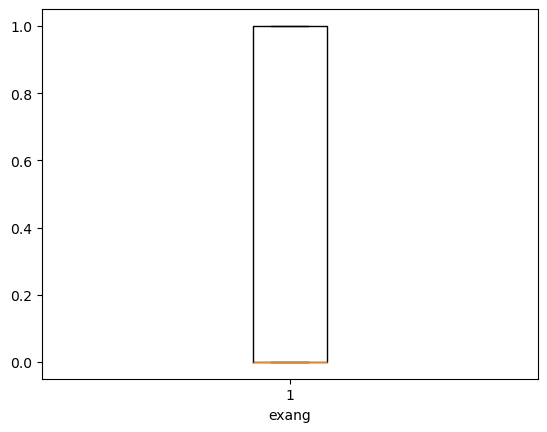

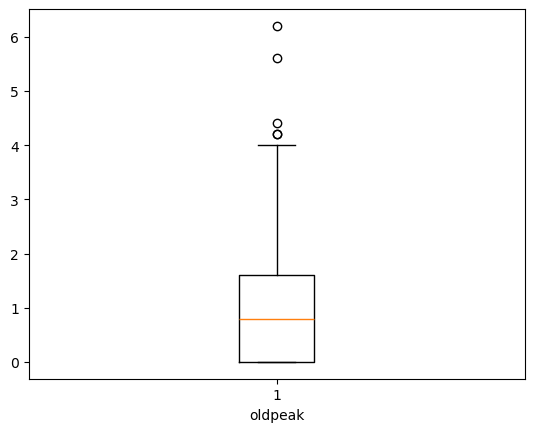

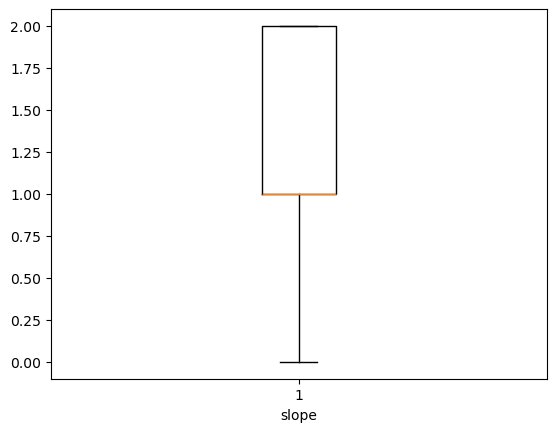

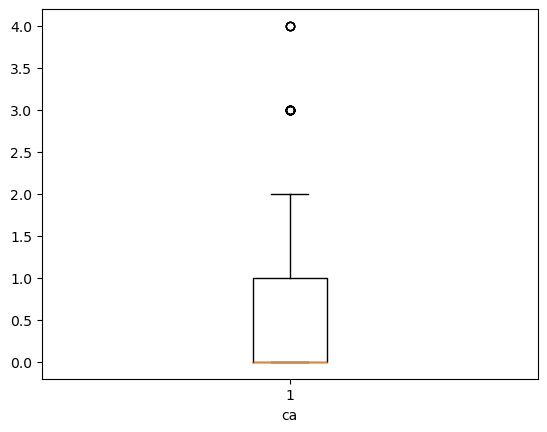

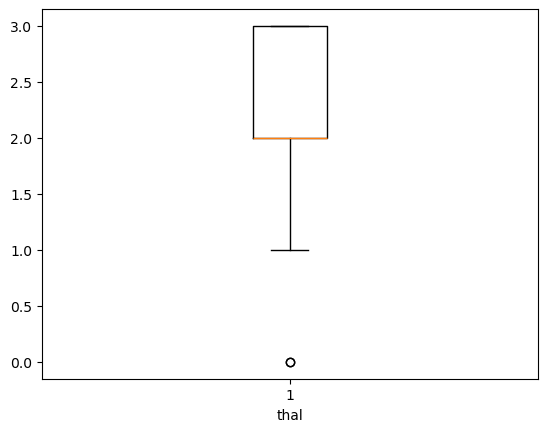

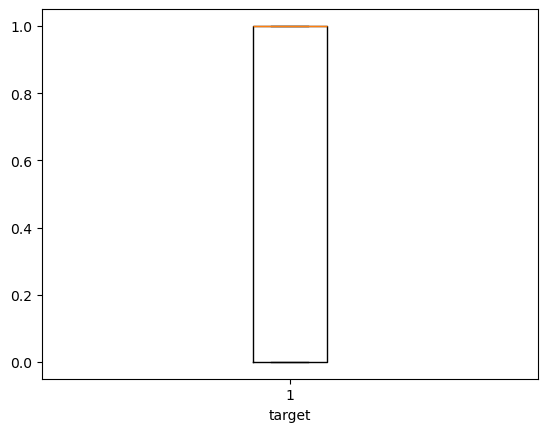

In [ ]:
#checking outliers
col=list(df.columns)
col
for i in col:
    if(df[i].dtypes=="int64" or df[i].dtypes=="float64"):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()


In [ ]:
# reason or not removing the outliers
# unlike algorithems like linear reression or kmenas,decisions trees are not sensistive to outliers
# decisions tree split the data based on the feature to form branches
# the foucus is not actuval values but on how well te split separtes the raget classes


<Axes: >

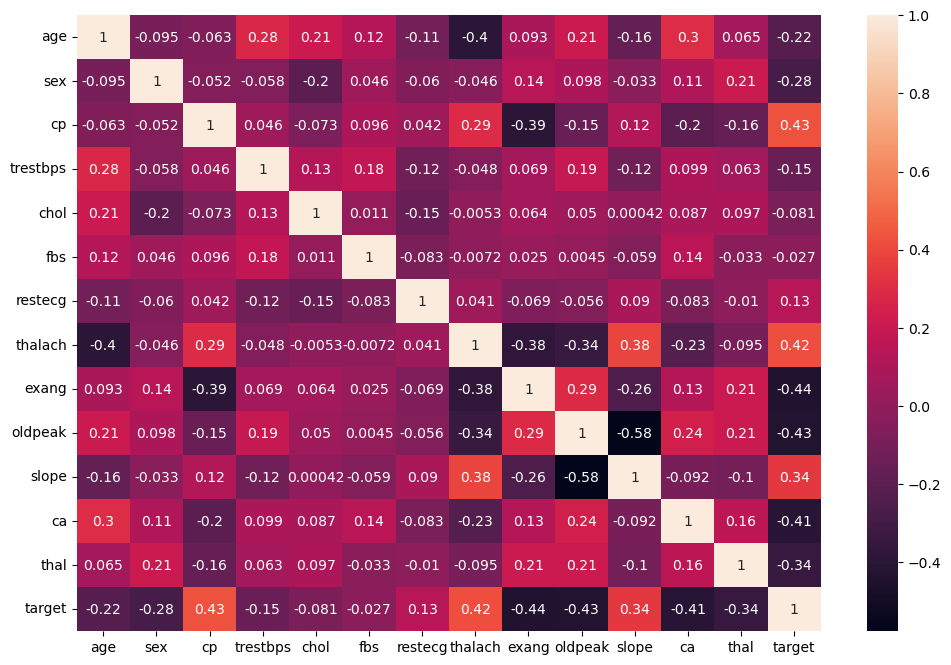

In [ ]:
# Check for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# storing the data
X=df.drop(columns=['target'])
y=df['target']


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [ ]:
#spliting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)


In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
compare=pd.DataFrame({'actual':y_test,'predicted':y_pred})
compare

,actual,predicted
242,0,1
130,1,1
200,0,0
160,1,1
124,1,1
...,...,...
177,0,1
65,1,1
11,1,1
67,1,1


In [ ]:
accuracy_score(y_pred,y_test)

0.8360655737704918

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  4],
       [ 8, 26]], dtype=int64)

[Text(0.5461956521739131, 0.95, 'x[2] <= 0.5\ngini = 0.496\nsamples = 241\nvalue = [110, 131]'),
 Text(0.33695652173913043, 0.85, 'x[11] <= 0.5\ngini = 0.409\nsamples = 115\nvalue = [82, 33]'),
 Text(0.44157608695652173, 0.8999999999999999, 'True  '),
 Text(0.21739130434782608, 0.75, 'x[12] <= 2.5\ngini = 0.499\nsamples = 55\nvalue = [26.0, 29.0]'),
 Text(0.10869565217391304, 0.65, 'x[8] <= 0.5\ngini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.043478260869565216, 0.55, 'x[7] <= 96.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.021739130434782608, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06521739130434782, 0.45, 'x[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.043478260869565216, 0.35, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.08695652173913043, 0.35, 'x[10] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06521739130434782, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10869565217391304, 0.25, 'gi

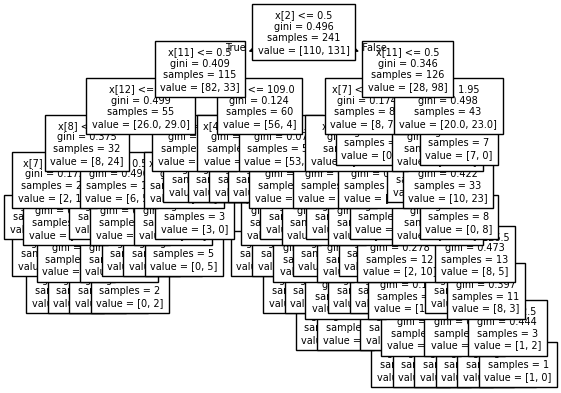

In [ ]:
from sklearn import tree
tree.plot_tree(model,fontsize=7)

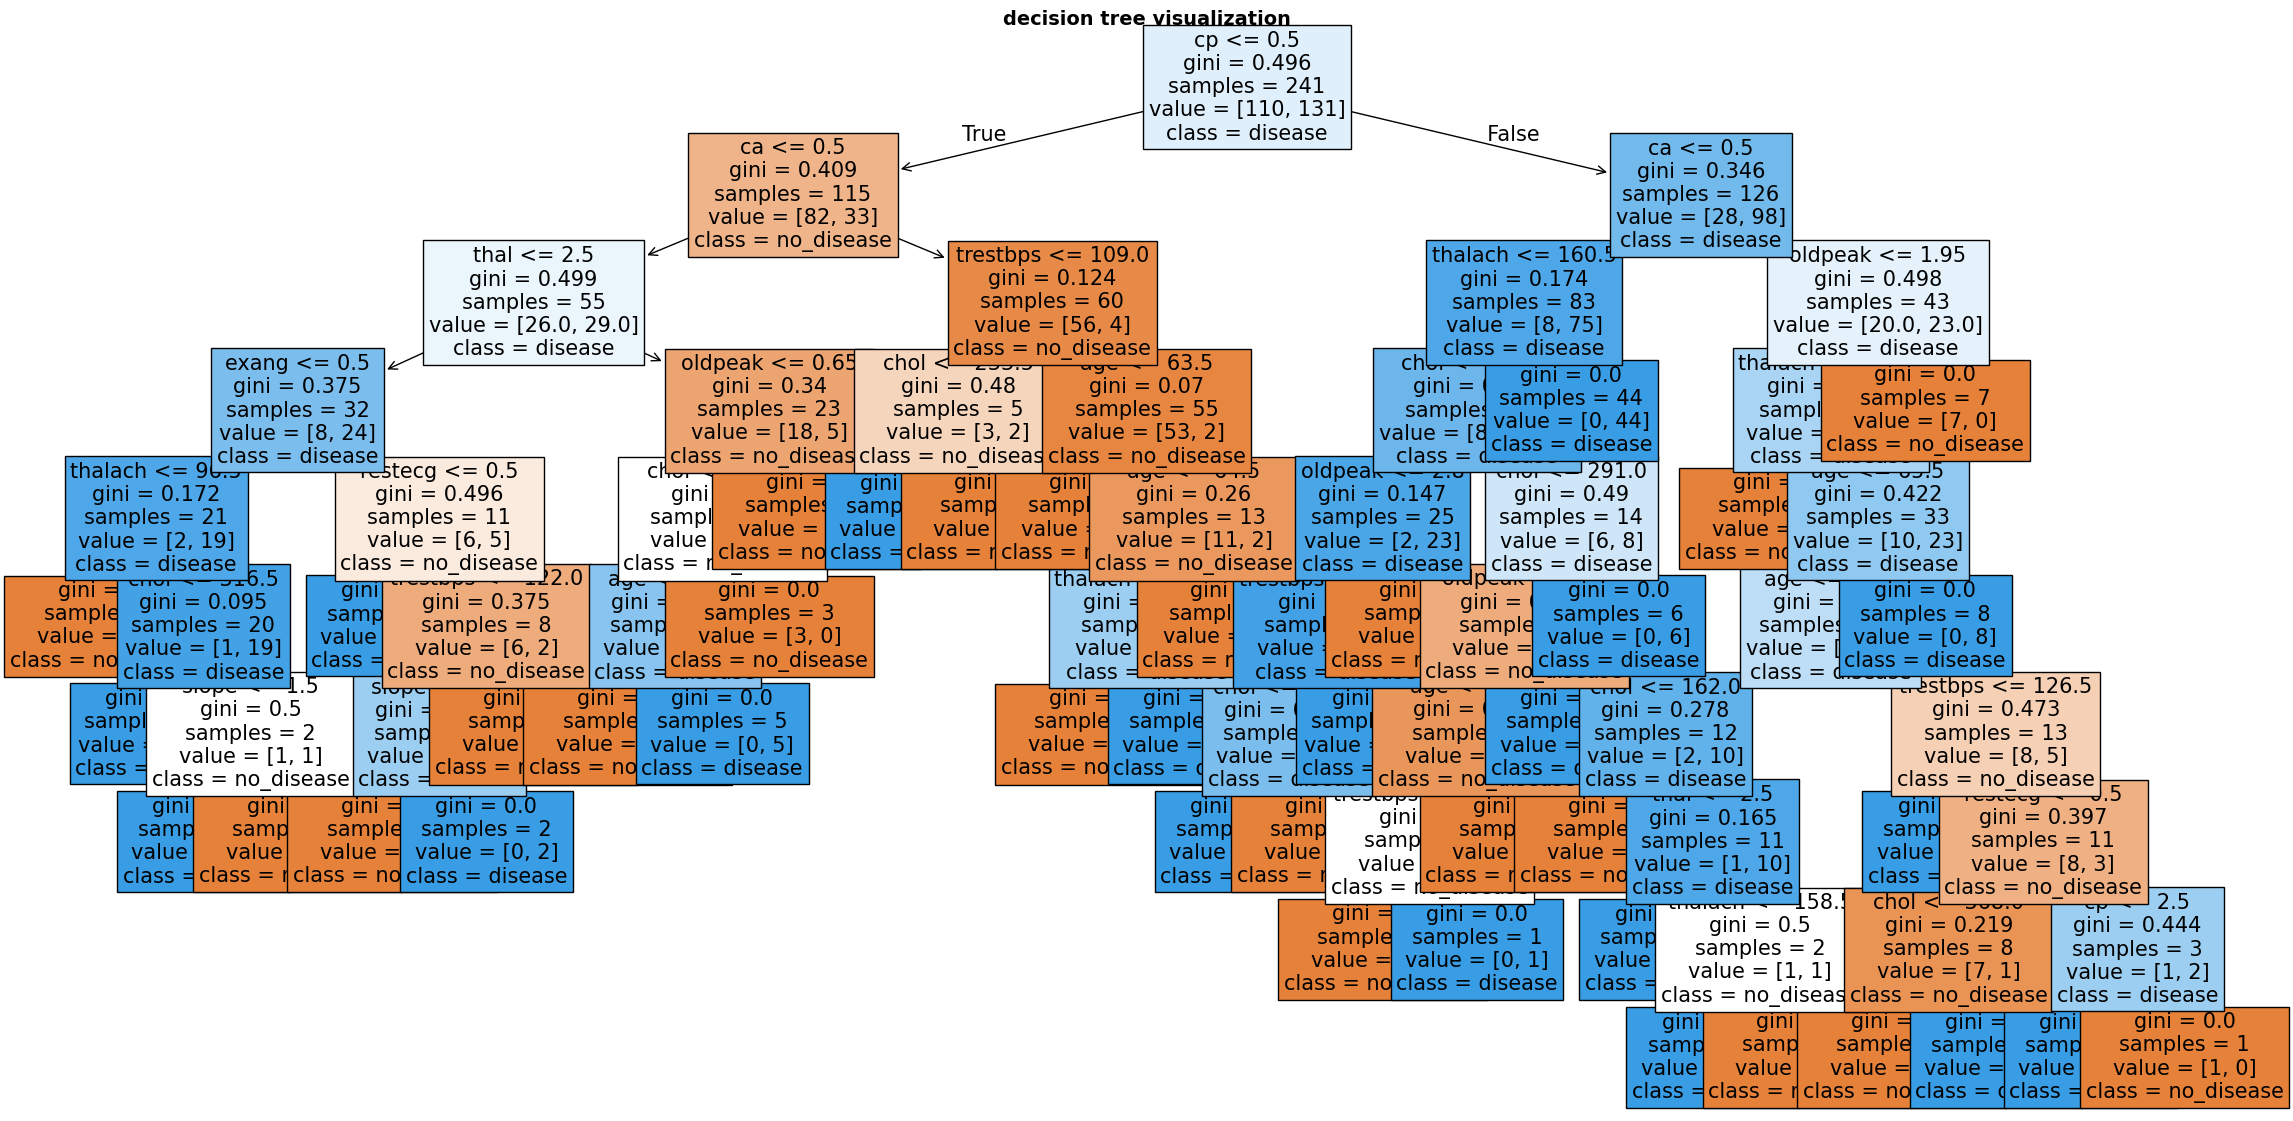

In [ ]:
plt.figure(figsize =(28, 14))
tree.plot_tree(model,
               feature_names = X_train.columns,
               class_names = ['no_disease', 'disease'],
               filled = True,
               fontsize  = 15)

plt.title('decision tree visualization', fontsize =14, fontweight ='bold')
plt.show()

In [ ]:
row_values = X_test.iloc[0].to_list()
new_data = [row_values]

predictions = model.predict(new_data)
predictions

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#both measures impurity and usually give very similar split

#gini impurity is slightly faster as compared to entropy

#hyperparameter -
#max_depth -> max_depth is a parameter that defines the maximum no of levels
#your decision tree is allowed to grow


#prevent overfitting: if a tree is too deep  it learns the training data well and perform badly on the
#testing data

#speed up training

#shallow tree are easier to understand and interpret

In [ ]:
depth =[1,2,3,4,5,6,7,8]

for i in depth:
  model = DecisionTreeClassifier(max_depth = i, random_state = 43)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"maxdepth {i} accuracy score {acc}")


In [ ]:
model.get_depth() # give optimal max depth of your model

In [ ]:
# hyperparameter tuning

# in ml, the hyperparameter is a setting you choosing before training a model

# without tuning, model might undefit and overfit so tuning helps us balance the model



# two common types of hyperparameter tuning


#1. gridsearchCv : try all possible combination of given hyperparameter values

# how it works:

# you give a list of parameter
#it tries every possible combination
# pick the best one with best performance


# RandomizedSearchCv :

# instead of trying all combinations, it randomly picks a few combination

#how it works:

# you defined range of params
#it tries only a fixed no of random combination
# faster than grid
# max depth - maximum depth of the tree

# min_sample_split - minumum no of sample required to split a node


#  min_sample_leaf - mininu no of sample required to be at a leaf(final decision)

# creteria - metric used to meaure the quality of split

# max_features - number of features consider when looking for a best split


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
new_model = DecisionTreeClassifier()

In [ ]:
grid_params ={'criterion':['gini', 'entropy'], 'max_depth':[1,5,7,8,50,100],
              'random_state': [0,1,3,4,5,40,45],'min_samples_split':[2,6,8,9,3,5,22,20],
              'min_samples_leaf': [1,4,6,7,9,10],'max_features':[3,5,7,9,10]}

In [ ]:
# cv -> stands for cross_validation...

# it is techinque used to evlaute the model performance more accurately

# istead of splitting into one train test split . we split it multiple times
#

gv = GridSearchCV(estimator= new_model, param_grid= grid_params, cv =3 )

In [ ]:
gv.fit(x_train, y_train)

In [ ]:
gv.best_params_

In [ ]:
dt_model =  gv.best_estimator_

In [ ]:
y_pred_1 = dt_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
new_model1 = DecisionTreeClassifier()

In [ ]:
grid_params ={'criterion':['gini', 'entropy'], 'max_depth':[1,5,7,8,50,100],
              'random_state': [0,1,3,4,5,40,45],'min_samples_split':[2,6,8,9,3,5,22,20],
              'min_samples_leaf': [1,4,6,7,9,10]}

In [ ]:
rv = RandomizedSearchCV(estimator = new_model1,
                        param_distributions = grid_params,
                        n_iter =20,
                        cv= 3,
                        random_state = 42,
                        n_jobs= -1)

In [ ]:
rv.fit(x_train, y_train)

In [ ]:
rv.best_params_

In [ ]:
{'random_state': 45,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
dt_model_1 = rv.best_estimator_

In [ ]:
y_pred_2 = dt_model_1.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_2)

In [ ]:
session link:https://colab.research.google.com/drive/1BU8WkL8_JajRdTCaxV6Fx0Mpb-5UobF8?usp=sharing